THIS DATASET IS ABOUT CAR PRICE PRIDICTION WHERE OUR TARGET IS CONTINIOUS,
HENCE EITHER WE USE LINEAR REGRESSION OR RANDOM FOREST REGRESSION .
I HAVE USED RANDOM FOREST REGRESSOR ALGORITHM TO PREDICT THE PRICE OF CAR .
WE CAN USE DECISON TREE REGRESSSOR ALSO.



In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [158]:
df=pd.read_csv("data\\car data.csv")

In [159]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [160]:
df.shape

(301, 9)

In [161]:
 # pridicting the selling _price that is  second hand car price pridicction

In [162]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [163]:
print(df["Seller_Type"].unique())

['Dealer' 'Individual']


In [164]:
print(df["Transmission"].unique())

['Manual' 'Automatic']


In [165]:
print(df["Owner"].unique())

[0 1 3]


In [166]:
print(df["Fuel_Type"].unique())

['Petrol' 'Diesel' 'CNG']


In [167]:
# missing values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [168]:
df.describe() # for all mathematical operations

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [169]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [170]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [171]:

# lets create the new column that is current year


In [172]:
final_dataset["current_year"]=2020# new column is created.

In [173]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [174]:
# now we want to know how many years old the car is , so we subtract current year - year.
# so we got to know about the how many earr old the car is.

In [175]:
final_dataset["no_of_year"]=final_dataset["current_year"]-final_dataset["Year"]

In [176]:
final_dataset # new dataset is created with no_of_year column.so now we dont need the year and current year column 
# so we drop that columns from dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [177]:
final_dataset.drop(["Year"],axis=1,inplace=True)
final_dataset.drop(["current_year"],axis=1,inplace=True)# sucessfully drop the Year column

In [178]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [179]:

final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [180]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [181]:
# leat convert catagorical feature into numeric feature. using pandas dummies .
final_dataset=pd.get_dummies(final_dataset,drop_first=True) # to prevent from dummy variable trap .it will drop one type of catagory under column

In [182]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [183]:
# lets check the correlation 
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


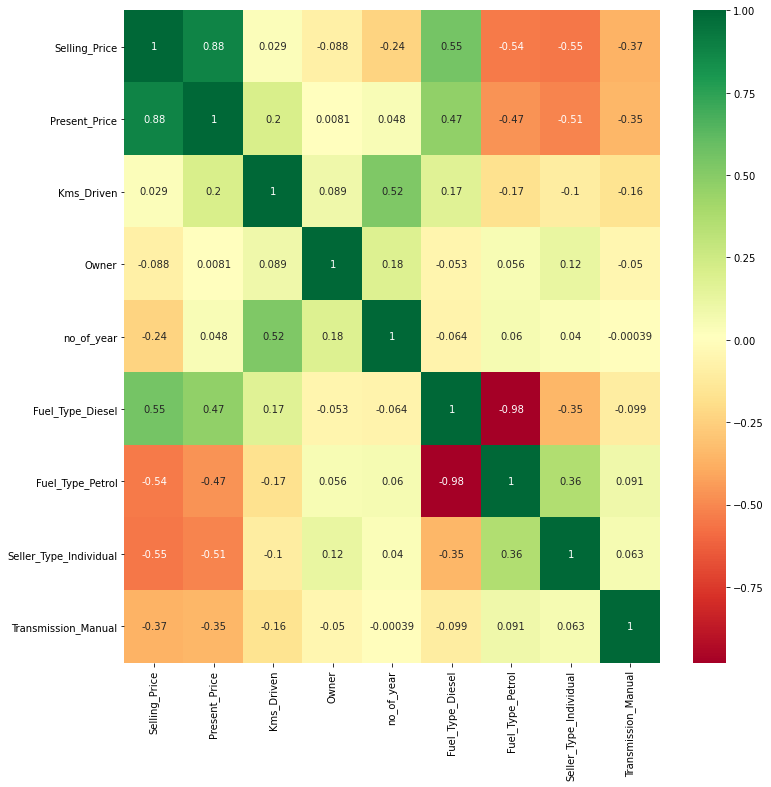

In [184]:
plt.figure(figsize=(12,12))
sns.heatmap(final_dataset.corr(),annot=True,cmap="RdYlGn");
#corrmat=final_dataset.corr() top_corr_features=corrmat.index 
#plt.figure(figsize=(20,20)) 
#g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [185]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [186]:
x

,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,4,1,0,0,1
297,5.90,60000,0,5,0,1,0,1
298,11.00,87934,0,11,0,1,0,1
299,12.50,9000,0,3,1,0,0,1


In [187]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [188]:
# x and y are separted to tarin the model.

In [189]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [190]:
model.feature_importances_ # it will tell us which fetaure has higher importance. and which has less important


array([0.36794843, 0.04498259, 0.00038925, 0.07411117, 0.23201892,
       0.00839488, 0.13251759, 0.13963717])

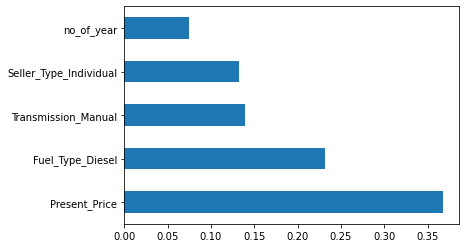

In [191]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [193]:
x_train.shape

(210, 8)

In [194]:
x_test.shape

(91, 8)

In [195]:
# we are usinh here random forest regressor as our target is continious .or numeric

# random forest regressor uses decision tree so for now scaling is not needed/
from sklearn.ensemble import RandomForestRegressor


In [196]:
rf_random=RandomForestRegressor()

In [197]:
rf_random.fit(x_train,y_train)

RandomForestRegressor()

In [198]:
y_pred=rf_random.predict(x_test)

In [199]:
y_pred

array([ 6.567 ,  2.9715,  0.4522,  2.944 ,  1.0712,  5.1585,  0.816 ,
        3.2035,  9.0375,  0.5666,  8.3415,  3.805 ,  5.3795,  4.0215,
        0.1521,  0.4447,  7.212 ,  5.412 ,  5.15  ,  7.2425,  5.125 ,
        3.5955, 10.2628,  7.2195, 12.4786,  3.0775,  3.2313,  0.5608,
        0.2777,  0.4725,  0.2901,  0.2407,  5.2925, 24.8465, 22.324 ,
        3.9695,  3.2985,  0.9408,  0.2979,  4.0045,  9.7495, 10.929 ,
        0.3101,  4.3095,  4.4465,  4.5905,  6.058 ,  7.5795,  7.478 ,
        1.0857,  4.9585,  0.4636,  2.909 ,  4.1955,  1.1335,  0.1304,
       22.747 ,  0.6327,  6.105 ,  5.9655,  0.2859,  1.563 , 11.4855,
        4.697 ,  0.4722,  0.564 ,  2.2696,  0.3926,  5.5925,  0.2877,
        9.4325,  7.719 ,  6.2832,  0.4172,  1.0859,  2.3891,  2.4823,
       10.916 ,  7.968 ,  4.995 ,  2.8755,  1.1741, 10.528 , 10.6935,
        1.1312,  5.4545,  2.956 ,  0.5922,  0.6452,  6.475 ,  5.321 ])

In [200]:
rf_random.score(x_train,y_train)

0.9859223442845555

In [201]:
rf_random.score(x_test,y_test)

0.8835605997561088

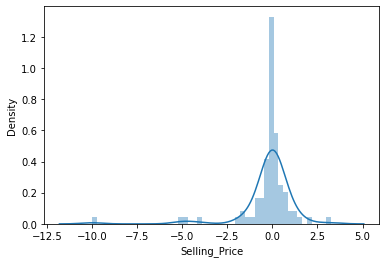

In [202]:
sns.distplot(y_test-y_pred);

In [1]:
plt.scatter(y_test,y_pred);

NameError: name 'plt' is not defined

In [204]:
# it is almost linearly distributed.

# CAMPUS RECRUITMENT

This data set consists of Placement data of students in our campus. 
It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, 
type and Work experience and salary offers to the placed students

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data\\placement.csv")

In [3]:
df# it will show 5 head and 5 tail records

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [5]:
df.shape

(215, 15)

In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
# 7 columns are numeric here.
#rest are catagorical features.
# lets check datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
# 8 columns has string values.


In [9]:
df["gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0      M
1      M
2      M
3      M
4      M
      ..
210    M
211    M
212    M
213    F
214    M
Name: gender, Length: 215, dtype: object>

In [10]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
# salary column has 67 null value counts
df["salary"].value_counts

<bound method IndexOpsMixin.value_counts of 0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64>

In [13]:
df["salary"].mean()


288655.4054054054

In [14]:
df["salary"].median()

265000.0

In [15]:
# meaan and median not having much difference lets fill null value with mean value
df["salary"].fillna(df["salary"].mean(),inplace=True)

In [16]:
df["salary"]

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

In [17]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [18]:
# no null values.
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


# our target column is status 
Can we predict if a candiate was placed in a role after their MBA studies? 
If so, which factors helped the most (ie. work experience, degree, school results, gender, etc)?

In [19]:
# we can here use logistic regression , vaive bayes model, svm,decision tree, random forest to check the
# accuracy

In [20]:
# make Id column as dataframe index itself 
df.set_index("sl_no",inplace=True)

In [21]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000


In [22]:
df_num=df.select_dtypes(['int64','float64'])

In [23]:
df_num# numeric columns

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.000000
2,79.33,78.33,77.48,86.5,66.28,200000.000000
3,65.00,68.00,64.00,75.0,57.80,250000.000000
4,56.00,52.00,52.00,66.0,59.43,288655.405405
5,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.000000
212,58.00,60.00,72.00,74.0,53.62,275000.000000
213,67.00,67.00,73.00,59.0,69.72,295000.000000


In [24]:
df["ssc_p"].value_counts

<bound method IndexOpsMixin.value_counts of sl_no
1      67.00
2      79.33
3      65.00
4      56.00
5      85.80
       ...  
211    80.60
212    58.00
213    67.00
214    74.00
215    62.00
Name: ssc_p, Length: 215, dtype: float64>

In [25]:
df_cat=df.select_dtypes(["object"])

In [26]:

df["degree_t"].value_counts

<bound method IndexOpsMixin.value_counts of sl_no
1       Sci&Tech
2       Sci&Tech
3      Comm&Mgmt
4       Sci&Tech
5      Comm&Mgmt
         ...    
211    Comm&Mgmt
212     Sci&Tech
213    Comm&Mgmt
214    Comm&Mgmt
215    Comm&Mgmt
Name: degree_t, Length: 215, dtype: object>

In [27]:
df_cat # all catagorical columns

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


In [28]:
# 1 =placed , 0 =not placed

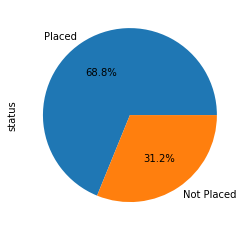

In [15]:
df["status"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
# highly imbalance data

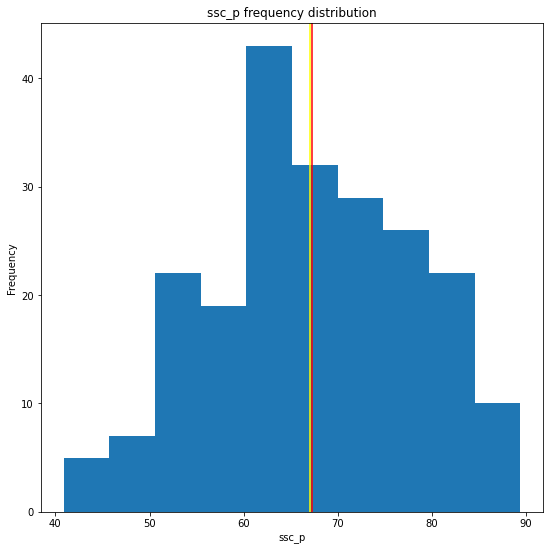

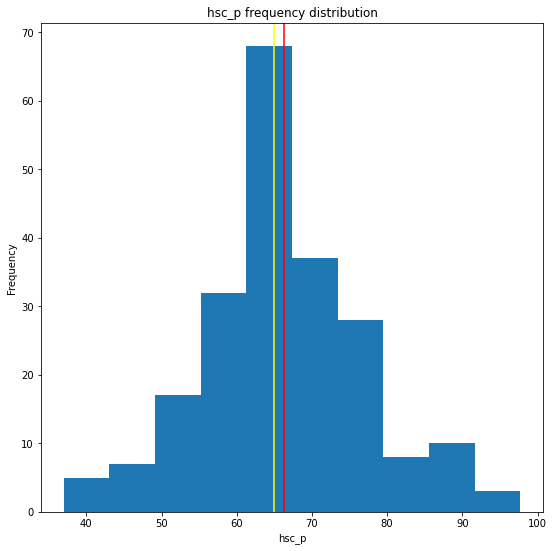

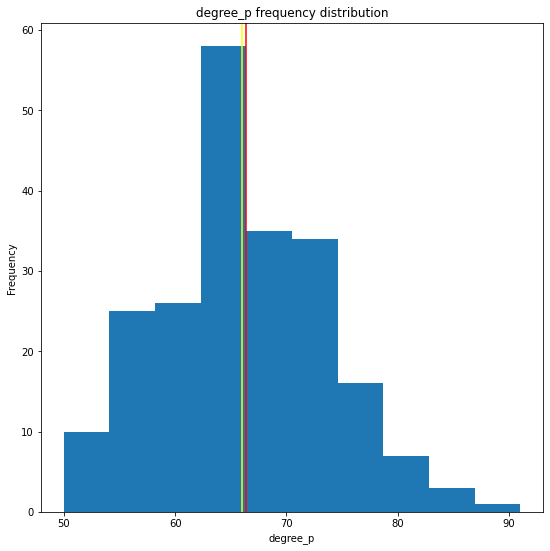

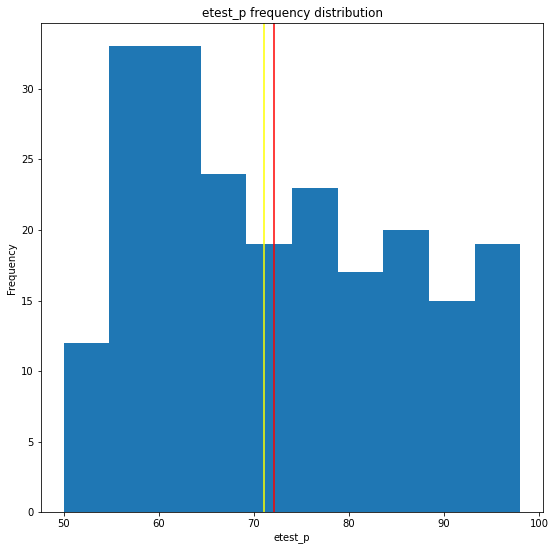

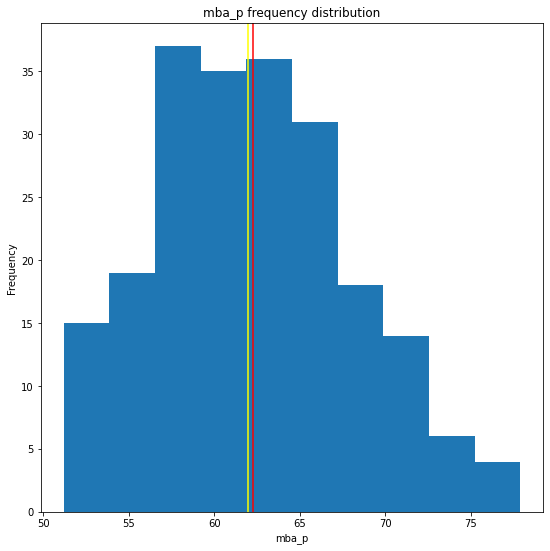

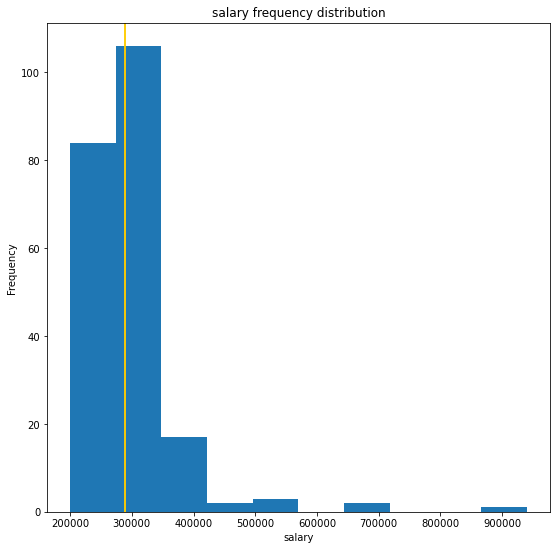

In [29]:
# univariate normal distribution data analysis 
for i in df_num:
    plt.figure(figsize=(9,9))
    plt.hist(df_num[i],bins=10)
    plt.title("{} frequency distribution".format(i))
    plt.axvline(df_num[i].mean(),color="red")
    plt.axvline(df_num[i].median(),color="yellow")
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

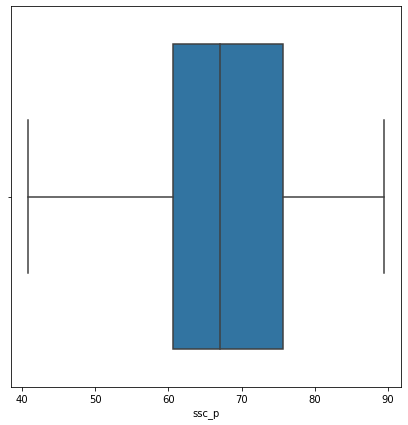

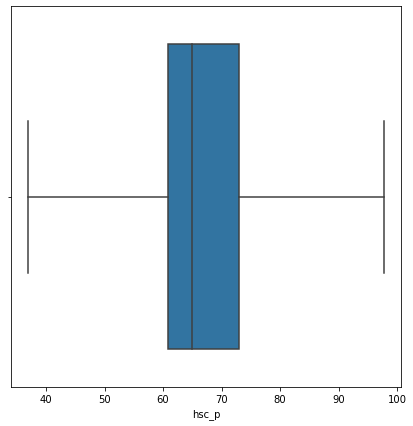

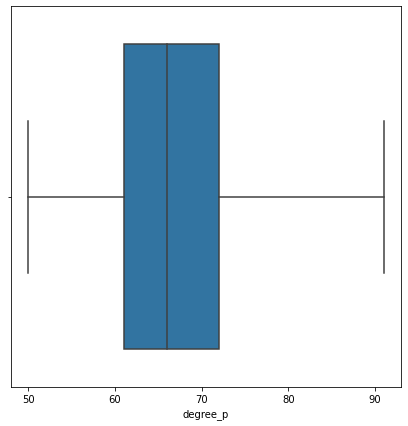

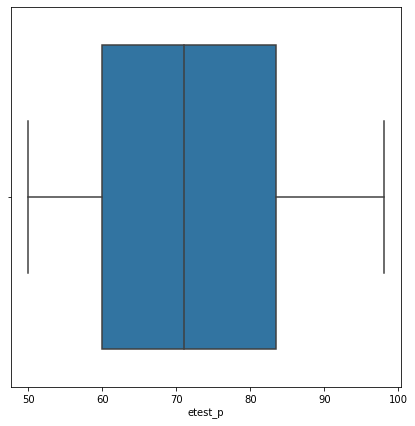

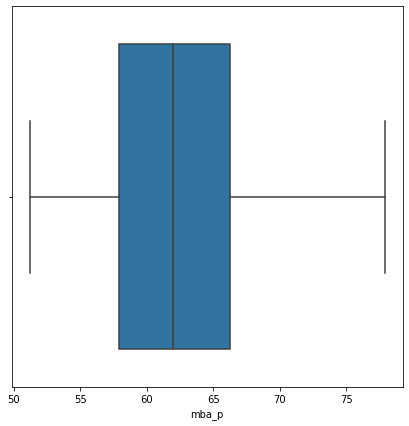

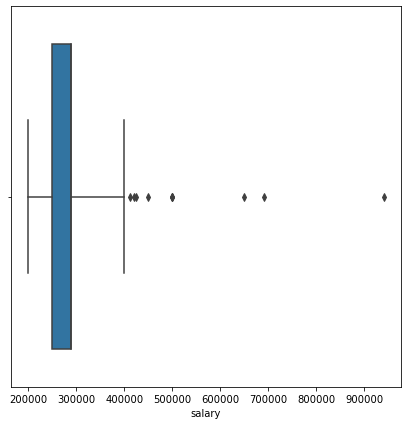

In [30]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()
    # hsc_p has many outliers .
    #but after gining 3 as constant value now we dont have any more outliers.

In [31]:
# lets check for correlation
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


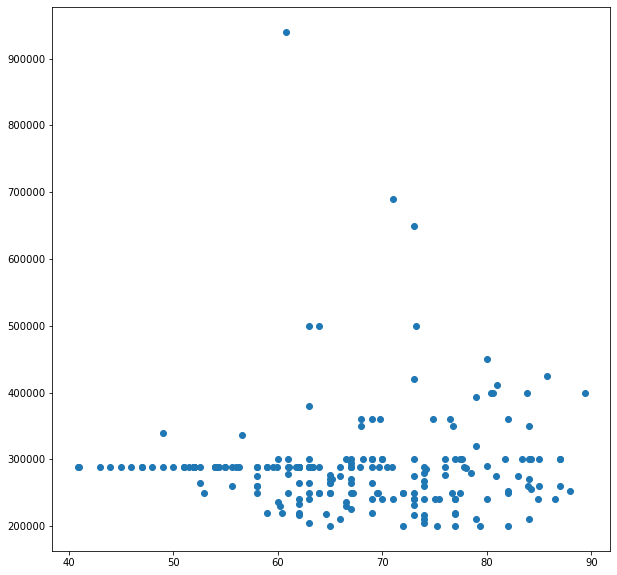

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(data=df,x="ssc_p",y="salary")
plt.show()

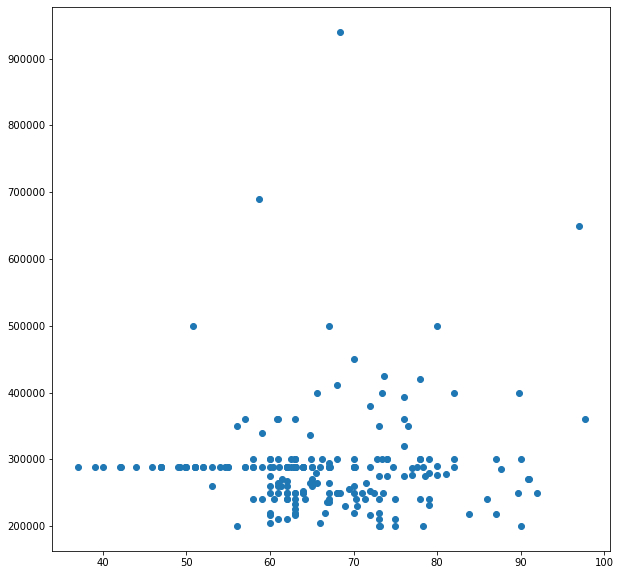

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(data=df,x="hsc_p",y="salary")
plt.show()

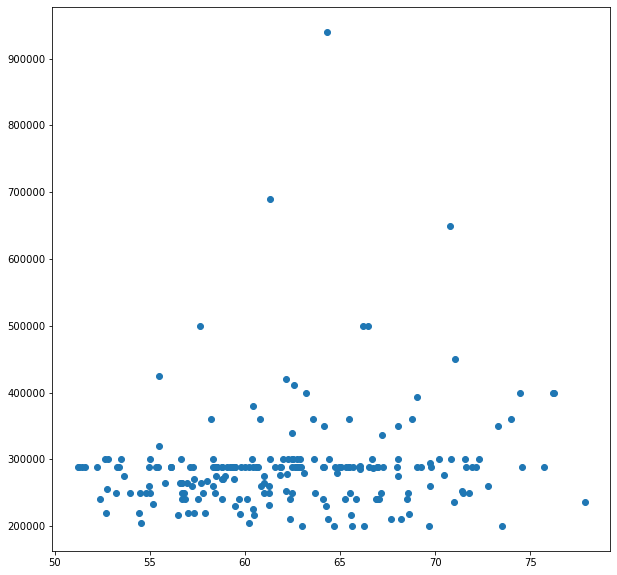

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(data=df,x="mba_p",y="salary")
plt.show()

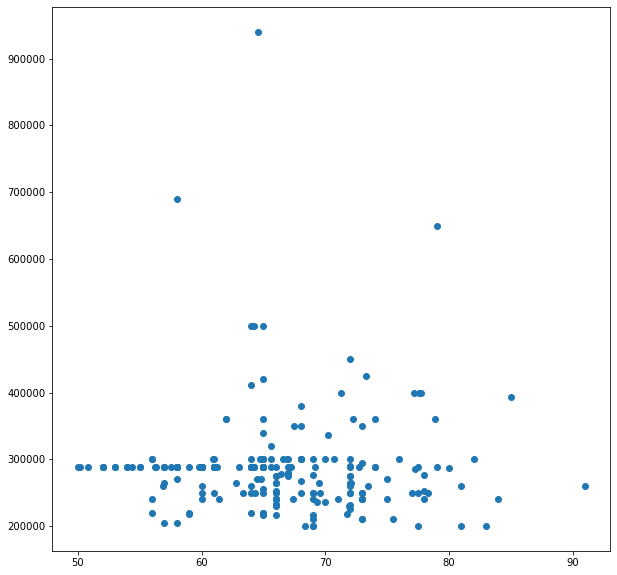

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(data=df,x="degree_p",y="salary")
plt.show()

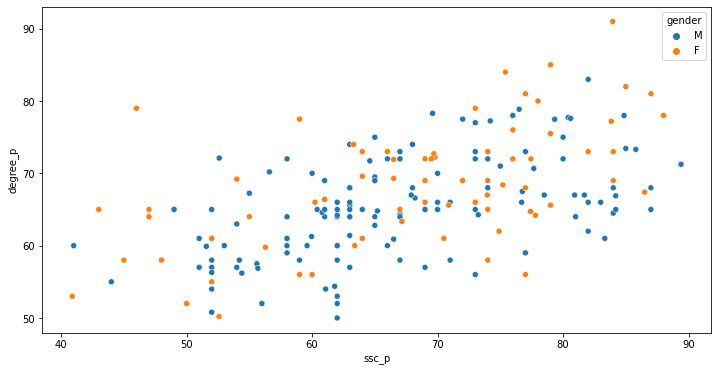

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='ssc_p', y='degree_p', hue='gender')
plt.show()

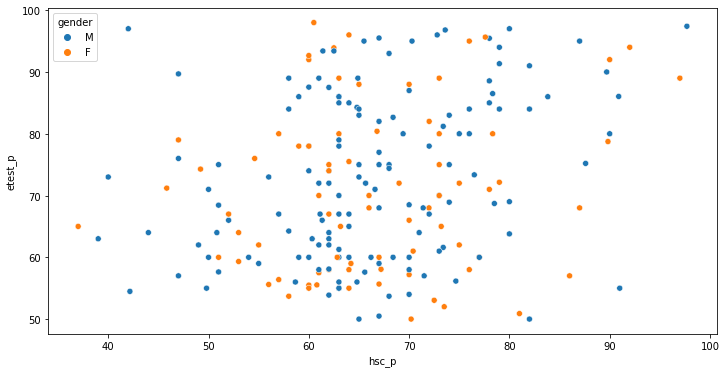

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='hsc_p', y='etest_p', hue='gender')
plt.show()

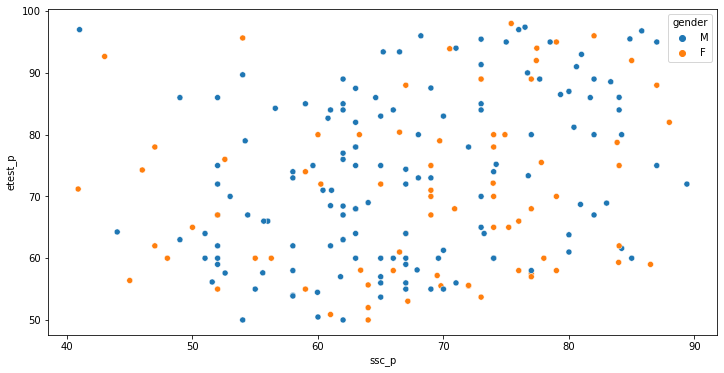

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='ssc_p', y='etest_p', hue='gender')
plt.show()

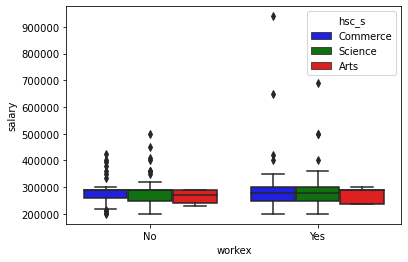

In [39]:
sns.boxplot(x='workex', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red']);

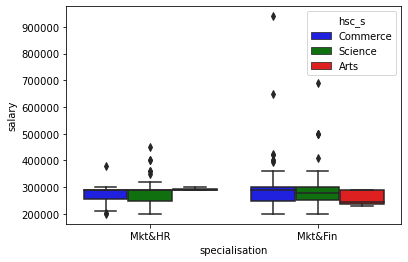

In [40]:
sns.boxplot(x='specialisation', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red']);

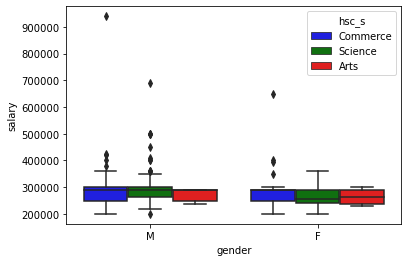

In [41]:
sns.boxplot(x='gender', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red']);

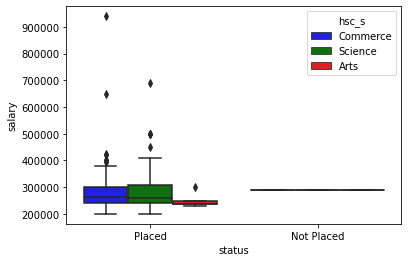

In [42]:
sns.boxplot(x='status', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red']);

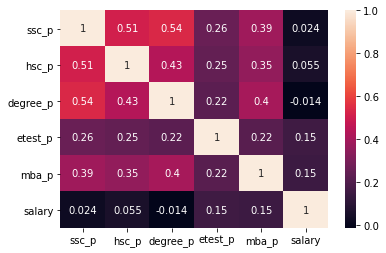

In [43]:
sns.heatmap(df.corr(), annot=True);

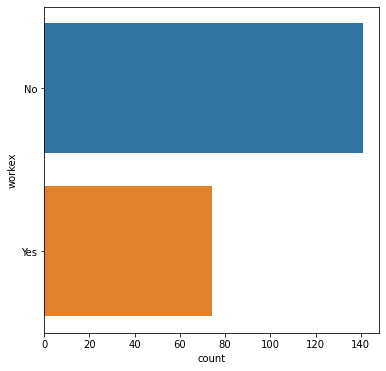

In [44]:
# lets perform on catagorical data 
#countplot univariate graphical analysis 
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,y="workex")
plt.show()

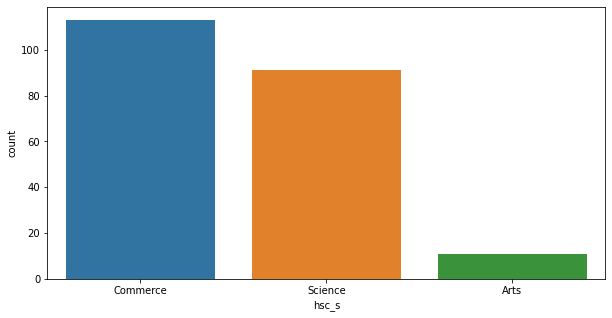

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df['hsc_s']);

In [46]:
df_cat.columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

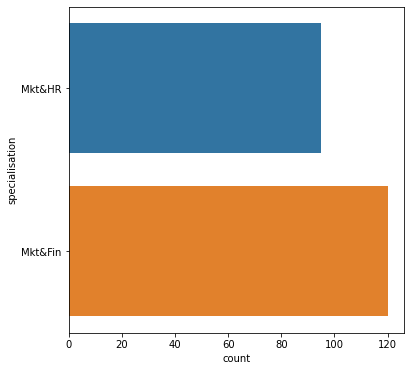

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,y="specialisation")
plt.show()

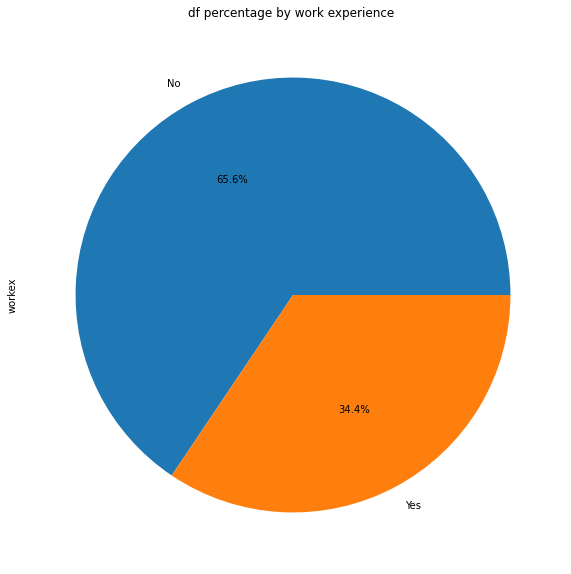

In [48]:
plt.figure(figsize=(10,10))
df_cat['workex'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("df percentage by work experience ")
plt.show()

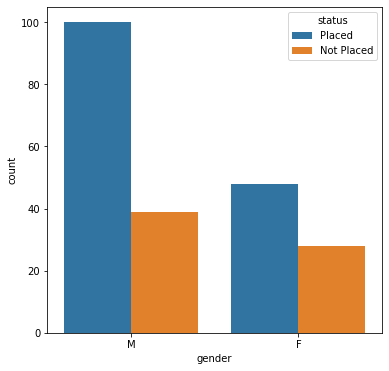

In [49]:
#Who is getting more placements girls or boys?
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,x="gender",hue="status")
plt.show()
# we can see male placed count is more than female , and female placed rate is low

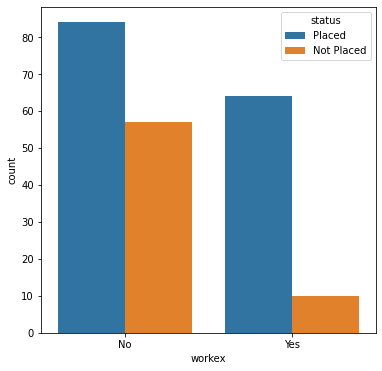

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,x="workex",hue="status")
plt.show()

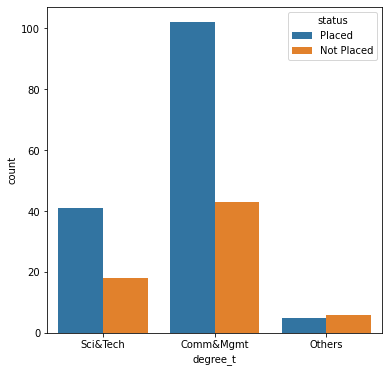

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,x="degree_t",hue="status")
plt.show()

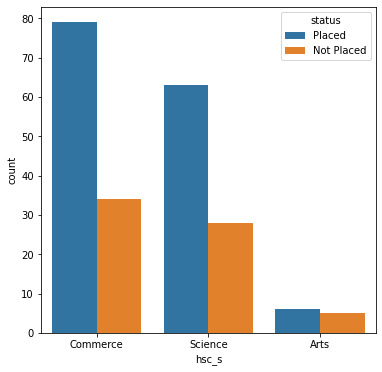

In [52]:

plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,x="hsc_s",hue="status")
plt.show()
# commerce backgroud students has placed more than science background

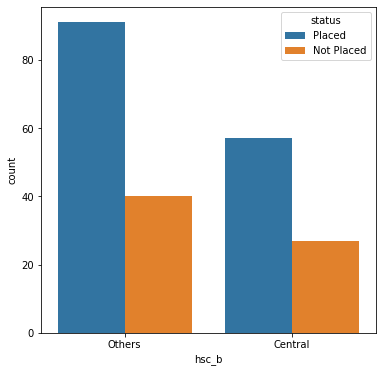

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,x="hsc_b",hue="status")
plt.show()
# other board count is more than cenral board.

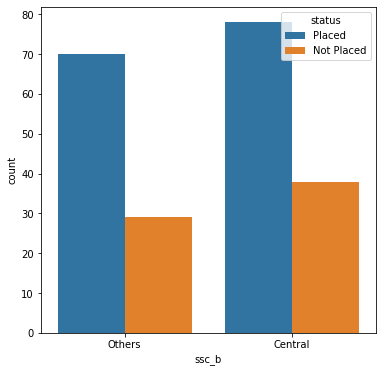

In [54]:
#To get placed in a company with high package which board should I choose (Central or State board) in 10th?
#The Range of salary is high for central board students with the median of 2.5 Lakhs per annum
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,x="ssc_b",hue="status")
plt.show()

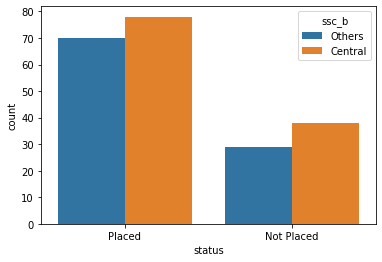

In [56]:
sns.countplot(df['status'],hue=df['ssc_b'])
plt.show()

In [137]:
# it meaan ssc_b is playing important feature ,in ssc central board student is hired more.



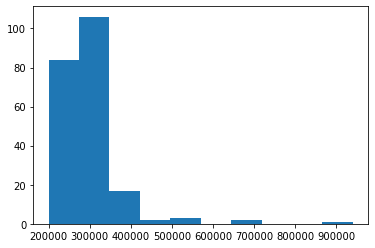

In [63]:
#To get placed in a company with high package which board should I choose (Central or State board) in 12th?
plt.hist(df["salary"]);

In [173]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

In [174]:

# 6 columns performing label encoder
#gender,status,ssc_b,hsc_b,workex,specialization

le = LabelEncoder()
df_cat['gender'] = le.fit_transform(df_cat['gender'])
df_cat['status'] = le.fit_transform(df['status'])
df_cat['ssc_b'] = le.fit_transform(df_cat['ssc_b'])
df_cat['hsc_b'] = le.fit_transform(df_cat['hsc_b'])
df_cat['workex'] = le.fit_transform(df_cat['workex'])
df_cat['specialisation'] = le.fit_transform(df_cat['specialisation'])
#le.fit_transform(df['workex'])
df_cat.head()

,gender,ssc_b,hsc_b,workex,specialisation,status
sl_no,,,,,,
1,1,1,1,0,1,1
2,1,0,1,1,0,1
3,1,0,0,0,0,1
4,1,0,0,0,1,0
5,1,0,0,0,0,1


In [175]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          215 non-null    int64
 1   ssc_b           215 non-null    int64
 2   hsc_b           215 non-null    int64
 3   workex          215 non-null    int64
 4   specialisation  215 non-null    int64
 5   status          215 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 20.9 KB


In [176]:
 df["degree_t"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Sci&Tech
1       Sci&Tech
2      Comm&Mgmt
3       Sci&Tech
4      Comm&Mgmt
         ...    
210    Comm&Mgmt
211     Sci&Tech
212    Comm&Mgmt
213    Comm&Mgmt
214    Comm&Mgmt
Name: degree_t, Length: 215, dtype: object>

In [177]:
df["hsc_s"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Commerce
1       Science
2          Arts
3       Science
4      Commerce
         ...   
210    Commerce
211     Science
212    Commerce
213    Commerce
214     Science
Name: hsc_s, Length: 215, dtype: object>

In [178]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          215 non-null    int64
 1   ssc_b           215 non-null    int64
 2   hsc_b           215 non-null    int64
 3   workex          215 non-null    int64
 4   specialisation  215 non-null    int64
 5   status          215 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 20.9 KB


In [197]:
df_num

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.000000
2,79.33,78.33,77.48,86.5,66.28,200000.000000
3,65.00,68.00,64.00,75.0,57.80,250000.000000
4,56.00,52.00,52.00,66.0,59.43,288655.405405
5,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.000000
212,58.00,60.00,72.00,74.0,53.62,275000.000000
213,67.00,67.00,73.00,59.0,69.72,295000.000000


In [ ]:
df_num_minmaxscale=df_num.copy()

In [62]:
#now hsc_s and degree_t column will perform one hot encoding

In [224]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler()

# it always return series but i need dataframe 
# house_num_minmaxscale =scaler.fit_transform(house_num_minmaxscale)
# dataframe 
df_num_minmaxscale = pd.DataFrame(scaler.fit_transform(df_num_minmaxscale.values),
                                     columns=df_num_minmaxscale.columns,
                                     index=df_num_minmaxscale.index)

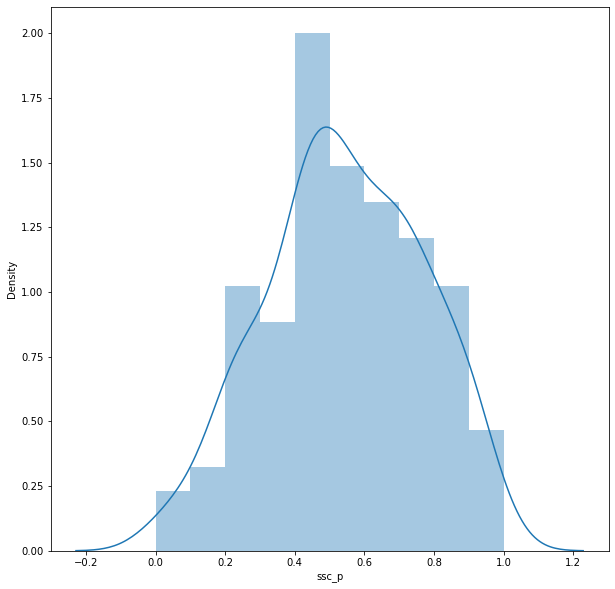

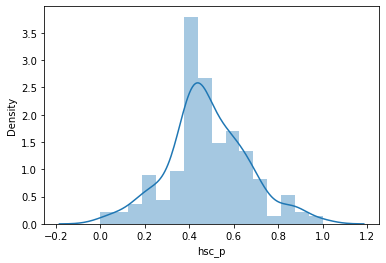

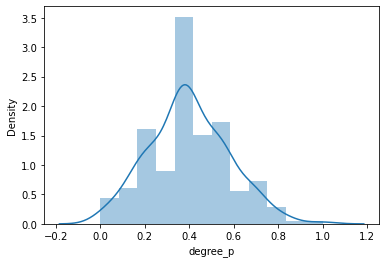

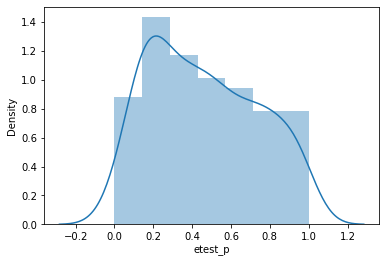

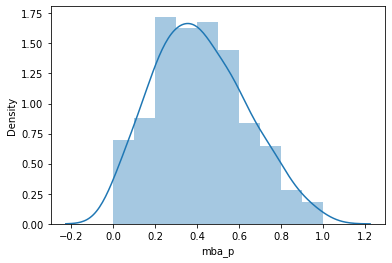

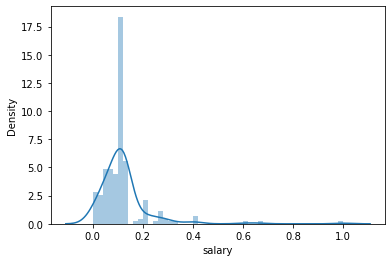

In [328]:
plt.figure(figsize=(10,10))

for i in df_num_minmaxscale:
    sns.distplot(df_num_minmaxscale[i])
    plt.show(i)
    


In [226]:
df_num_minmaxscale

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595
2,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000
3,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568
4,0.311482,0.247117,0.048780,0.333333,0.308096,0.119805
5,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054
...,...,...,...,...,...,...
211,0.818594,0.741351,0.673171,0.854167,0.872564,0.270270
212,0.352711,0.378913,0.536585,0.500000,0.090330,0.101351
213,0.538240,0.494234,0.560976,0.187500,0.693778,0.128378


In [227]:
dummyhsc=pd.get_dummies(df_cat["hsc_s"])
dummydegree=pd.get_dummies(df_cat["degree_t"])

KeyError: 'hsc_s'

In [184]:
# now concate dummymsz,dummyn,house_cat all togather 
dummy=pd.merge(dummyhsc,dummydegree,on="sl_no")

In [185]:
dummy

,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
sl_no,,,,,,
1,0,1,0,0,0,1
2,0,0,1,0,0,1
3,1,0,0,1,0,0
4,0,0,1,0,0,1
5,0,1,0,1,0,0
...,...,...,...,...,...,...
211,0,1,0,1,0,0
212,0,0,1,0,0,1
213,0,1,0,1,0,0


In [182]:
#df_cat.drop(["hsc_s","degree_t"],axis=1,inplace=True)

In [186]:
df_cat

,gender,ssc_b,hsc_b,workex,specialisation,status
sl_no,,,,,,
1,1,1,1,0,1,1
2,1,0,1,1,0,1
3,1,0,0,0,0,1
4,1,0,0,0,1,0
5,1,0,0,0,0,1
...,...,...,...,...,...,...
211,1,1,1,0,0,1
212,1,1,1,0,0,1
213,1,1,1,1,0,1


In [187]:
cat_dummy=pd.merge(df_cat,dummy,on="sl_no")

In [228]:
df_final=pd.merge(df_num_minmaxscale,cat_dummy,on="sl_no")

In [229]:
df_final

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,workex,specialisation,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
sl_no,,,,,,,,,,,,,,,,,,
1,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,1,1,1,0,1,1,0,1,0,0,0,1
2,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,1,0,1,1,0,1,0,0,1,0,0,1
3,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,1,0,0,0,0,1,1,0,0,1,0,0
4,0.311482,0.247117,0.048780,0.333333,0.308096,0.119805,1,0,0,0,1,0,0,0,1,0,0,1
5,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,1,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.818594,0.741351,0.673171,0.854167,0.872564,0.270270,1,1,1,0,0,1,0,1,0,1,0,0
212,0.352711,0.378913,0.536585,0.500000,0.090330,0.101351,1,1,1,0,0,1,0,0,1,0,0,1
213,0.538240,0.494234,0.560976,0.187500,0.693778,0.128378,1,1,1,1,0,1,0,1,0,1,0,0


In [230]:
df_final

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,workex,specialisation,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
sl_no,,,,,,,,,,,,,,,,,,
1,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,1,1,1,0,1,1,0,1,0,0,0,1
2,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,1,0,1,1,0,1,0,0,1,0,0,1
3,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,1,0,0,0,0,1,1,0,0,1,0,0
4,0.311482,0.247117,0.048780,0.333333,0.308096,0.119805,1,0,0,0,1,0,0,0,1,0,0,1
5,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,1,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.818594,0.741351,0.673171,0.854167,0.872564,0.270270,1,1,1,0,0,1,0,1,0,1,0,0
212,0.352711,0.378913,0.536585,0.500000,0.090330,0.101351,1,1,1,0,0,1,0,0,1,0,0,1
213,0.538240,0.494234,0.560976,0.187500,0.693778,0.128378,1,1,1,1,0,1,0,1,0,1,0,0


In [231]:
x=df_final.drop(["status"],axis=1)
y=df_final["status"]

# LogisticRegression 

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               random_state=1,
                                               test_size=0.3)

In [234]:
from sklearn.linear_model import LogisticRegression 

In [235]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_score=lr.score(x_test,y_test) # it will return Accuracy  
print("Accuracy",lr_score)

Accuracy 0.9076923076923077


In [236]:
# i want to check confusion metrix of training model 
# actual vs predicted
y_pred=lr.predict(x_test)

In [237]:
# logistic gression giving 90 % accuracy.

In [238]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9076923076923077


In [241]:
from sklearn.metrics import classification_report, confusion_matrix

In [242]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [243]:
print(tp,fp)
print(fn,tn)

45 6
0 14


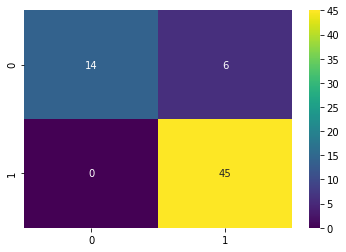

In [262]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis');

In [244]:
from sklearn.metrics import recall_score,f1_score ,precision_score

In [245]:
print("recall for FN ",recall_score(y_test,y_pred))

recall for FN  1.0


In [246]:
print("f1 score ",f1_score(y_test,y_pred))

f1 score  0.9375


In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.88      1.00      0.94        45

    accuracy                           0.91        65
   macro avg       0.94      0.85      0.88        65
weighted avg       0.92      0.91      0.90        65



In [249]:
print("precision score ",precision_score(y_test,y_pred))

precision score  0.8823529411764706


# KNeighborsClassifier

In [259]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(p=1, metric='minkowski', n_neighbors=4)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.8153846153846154

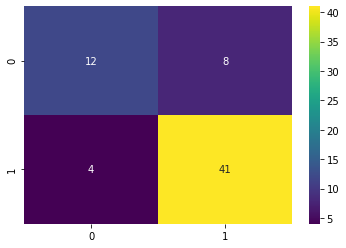

In [261]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, cmap='viridis');

In [263]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.84      0.91      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



# decision tree classifier

In [269]:
from sklearn.tree import DecisionTreeClassifier

In [270]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_predicted = decision_tree.predict(x_test)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predicted)
decision_tree_acc_score = accuracy_score(y_test,decision_tree_predicted)
print("confussion matrix")
print(decision_tree_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",decision_tree_acc_score,'\n')
print("-------------------------------------------")
print(classification_report(y_test,decision_tree_predicted))

confussion matrix
[[20  0]
 [ 1 44]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 0.9846153846153847 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.98      0.99        45

    accuracy                           0.98        65
   macro avg       0.98      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



In [271]:
print("training score => ",decision_tree.score(x_train,y_train))

training score =>  1.0


In [274]:
print("testing score => ",decision_tree.score(x_test,y_test))

testing score =>  0.9846153846153847


In [273]:
#decision tree is overfit always so we need to perform prunning 
# that means we can decide how many level decision tree expands 
# during training min_samples_leaf is parameter which help me to prevent my model
# to be overfit 

In [277]:
for i in range(50,100,5):
    decision_tree=DecisionTreeClassifier(min_samples_leaf=i)
    decision_tree.fit(x_train,y_train)
    decision_tree_score_tr=decision_tree.score(x_train,y_train)
    y_pred=decision_tree.predict(x_test)
    print("****************************************",i)
    print(classification_report(y_test,y_pred))
    # classification report 
    y_pred1=decision_tree.predict(x_train)
    print(classification_report(y_train,y_pred1))

**************************************** 50
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.90      0.78      0.83        45

    accuracy                           0.78        65
   macro avg       0.76      0.79      0.76        65
weighted avg       0.81      0.78      0.79        65

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        47
           1       0.90      0.81      0.85       103

    accuracy                           0.81       150
   macro avg       0.78      0.81      0.79       150
weighted avg       0.82      0.81      0.81       150

**************************************** 55
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.90      0.78      0.83        45

    accuracy                           0.78        65
   macro avg       0.76      0.79      0

In [284]:
# at leaf sample value 50 , we are gettiing good accuracy.
decision_tree=DecisionTreeClassifier(min_samples_leaf=50)
decision_tree.fit(x_train,y_train)
decision_tree_score_tr=decision_tree.score(x_train,y_train)
y_pred=decision_tree.predict(x_test)
print("****************************************",50)
print(classification_report(y_test,y_pred))
# classification report 
y_pred1=decision_tree.predict(x_train)
print(classification_report(y_train,y_pred1))    

**************************************** 50
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.90      0.78      0.83        45

    accuracy                           0.78        65
   macro avg       0.76      0.79      0.76        65
weighted avg       0.81      0.78      0.79        65

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        47
           1       0.90      0.81      0.85       103

    accuracy                           0.81       150
   macro avg       0.78      0.81      0.79       150
weighted avg       0.82      0.81      0.81       150



# super vector machine

In [291]:
from sklearn.svm import SVC


classifier = SVC(kernel = 'poly', random_state = 1)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8923076923076924

In [292]:
from sklearn.model_selection import GridSearchCV

In [294]:
C=[1.0,0.25] # margine 
kernel=["rbf","poly"]
decision_function_shape=["ovo","ovr"]
# ovr= one vs rest 
# ovo = one vs one 
svmg=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svmg,
                      cv=5,
                      param_grid=dict(kernel=kernel,C=C,
                                      decision_function_shape=decision_function_shape)
                      ,verbose = 5)
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
#so it is also gives cross fold validation so my model will be trained with all possible 
#patterns 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1.0, decision_function_shape=ovo, kernel=rbf ..................
[CV]  C=1.0, decision_function_shape=ovo, kernel=rbf, score=0.767, total=   0.0s
[CV] C=1.0, decision_function_shape=ovo, kernel=rbf ..................
[CV]  C=1.0, decision_function_shape=ovo, kernel=rbf, score=0.700, total=   0.0s
[CV] C=1.0, decision_function_shape=ovo, kernel=rbf ..................
[CV]  C=1.0, decision_function_shape=ovo, kernel=rbf, score=0.800, total=   0.0s
[CV] C=1.0, decision_function_shape=ovo, kernel=rbf ..................
[CV]  C=1.0, decision_function_shape=ovo, kernel=rbf, score=0.767, total=   0.0s
[CV] C=1.0, decision_function_shape=ovo, kernel=rbf ..................
[CV]  C=1.0, decision_function_shape=ovo, kernel=rbf, score=0.700, total=   0.0s
[CV] C=1.0, decision_function_shape=ovo, kernel=poly .................
[CV]  C=1.0, decision_function_shape=ovo, kernel=poly, score=0.933, total=   0.0s
[CV] C=1.0, decision_functi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV]  C=1.0, decision_function_shape=ovr, kernel=poly, score=0.867, total=   0.0s
[CV] C=1.0, decision_function_shape=ovr, kernel=poly .................
[CV]  C=1.0, decision_function_shape=ovr, kernel=poly, score=0.800, total=   0.0s
[CV] C=1.0, decision_function_shape=ovr, kernel=poly .................
[CV]  C=1.0, decision_function_shape=ovr, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.25, decision_function_shape=ovo, kernel=rbf .................
[CV]  C=0.25, decision_function_shape=ovo, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.25, decision_function_shape=ovo, kernel=rbf .................
[CV]  C=0.25, decision_function_shape=ovo, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.25, decision_function_shape=ovo, kernel=rbf .................
[CV]  C=0.25, decision_function_shape=ovo, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.25, decision_function_shape=ovo, kernel=rbf .................
[CV]  C=0.25, decision_function_shape=ovo, kernel=rbf, score=0.667, total=   0.0s

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


# naive bayes

In [295]:
from sklearn.naive_bayes import GaussianNB

In [296]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [297]:
y_pred = gnb.predict(x_test)

In [298]:
accuracy_score(y_test, y_pred)

1.0

In [299]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [300]:
(y_test != y_pred).sum()

0

In [301]:
# it is not good model since it is overfitting. 

# random forest classifier

In [302]:
from sklearn.ensemble import RandomForestClassifier 

In [303]:
rf=RandomForestClassifier(n_estimators=10,
                          max_features=16,
                          random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.98      0.99        45

    accuracy                           0.98        65
   macro avg       0.98      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



In [304]:
rf.score(x_train,y_train)

1.0

In [305]:
rf.score(x_test,y_test)

0.9846153846153847

In [306]:
x_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,workex,specialisation,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
sl_no,,,,,,,,,,,,,,,,,
109,0.414554,0.741351,0.463415,0.708333,0.266117,0.135135,1,0,0,0,0,0,1,0,1,0,0
208,0.874871,0.675453,0.268293,0.803333,0.762369,0.135135,1,0,1,1,0,0,1,0,1,0,0
107,0.416203,0.214168,0.097561,0.437500,0.542729,0.119805,1,1,1,0,0,0,0,1,0,0,1
108,0.847454,0.873147,0.804878,0.625000,0.836207,0.000000,1,1,1,0,1,0,1,0,1,0,0
52,0.278499,0.397364,0.151220,0.354167,0.428786,0.119805,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.497011,0.510708,0.463415,0.077083,0.142429,0.067568,1,0,1,0,1,0,0,1,1,0,0
128,0.641311,0.378913,0.463415,0.114583,0.269490,0.067568,0,1,1,0,1,0,0,1,1,0,0
117,0.562977,0.589786,0.404878,0.958333,0.736132,0.135135,1,0,0,1,0,0,1,0,1,0,0


In [310]:
y_pred=rf.predict([[0.414554,0.741351,0.463415,0.708333,0.266117,0.135135,1,0,0,0,0,0,1,0,1,0,0]])

In [311]:
y_pred

array([1])